In [1]:
import uproot
import pandas as pd
import numpy as np
import glob


In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [3]:
import glob

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/Kspip/MC15rd_etaetapip_loose_v3_241129"
cm_elements = ["MCrd_Ks_e7_18_4S_v3", "MCrd_Ks_e20_b26_v1", "MCrd_Ks_e20_e26_4S_v2", "MCrd_Ks_e21_5S_scan_v1", "MCrd_Ks_mori_off_v1"]
cut_expression = "Dp_isSignal == 1"

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["Ks"]

    # Specify the branches you want to extract
    # branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    branches = ['Dp_isSignal','Dp_M','Dp_CMS_cosTheta','Pip_cosTheta','Pip_p','Pip_charge']
    # Convert the selected branches to a Pandas DataFrame
    # df_temp = tree.arrays(branches, library="pd")
    df_temp = tree.arrays(
        branches,
        library="pd",
        entry_start=None,  # Optional: start at a specific entry
        entry_stop=None,   # Optional: stop at a specific entry
        filter_name=branches,  # Load only specified branches
        cut=cut_expression  # Apply the cut
    )
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

# df_bkg = df_bkg.query('Dp_isSignal!=1')
# df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

In [4]:
# df_bkg = df_bkg.query('num_Dstar_no_nan>0')
# df_bkg = df_bkg.query('Pip_pionID<0.01')
# df_bkg = df_bkg.query('Dp_M> 1.7 & Dp_M<2.1')
# df_bkg = df_bkg.query('Dp_M> 1.8 & Dp_M<2.05')

In [5]:
df_bkg.describe()

,Dp_isSignal,Dp_M,Dp_CMS_cosTheta,Pip_cosTheta,Pip_p,Pip_charge
count,2451319.0,2.451319e+06,2.451319e+06,2.451319e+06,2.451319e+06,2.451319e+06
mean,1.0,1.868468e+00,7.187010e-02,2.696775e-01,1.742698e+00,1.031689e-03
std,0.0,1.614982e-02,5.291863e-01,4.956641e-01,1.016949e+00,9.999997e-01
min,1.0,1.600204e+00,-9.999998e-01,-9.311164e-01,8.568603e-02,-1.000000e+00
25%,1.0,1.865827e+00,-3.811223e-01,-1.275891e-01,8.732903e-01,-1.000000e+00
50%,1.0,1.869510e+00,9.182282e-02,3.460908e-01,1.642110e+00,1.000000e+00
75%,1.0,1.872943e+00,5.349615e-01,7.156022e-01,2.451568e+00,1.000000e+00
max,1.0,2.099934e+00,9.999999e-01,9.774101e-01,7.028467e+00,1.000000e+00


In [6]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Dp_isSignal        False
Dp_M               False
Dp_CMS_cosTheta    False
Pip_cosTheta       False
Pip_p              False
Pip_charge         False
dtype: bool


In [7]:
# df_generic_matched = df_bkg.query('Dp_isSignal==1')
df_generic_matched = df_bkg.query('Dp_M>0')


In [8]:
df_generic_matched.describe()

,Dp_isSignal,Dp_M,Dp_CMS_cosTheta,Pip_cosTheta,Pip_p,Pip_charge
count,2451319.0,2.451319e+06,2.451319e+06,2.451319e+06,2.451319e+06,2.451319e+06
mean,1.0,1.868468e+00,7.187010e-02,2.696775e-01,1.742698e+00,1.031689e-03
std,0.0,1.614982e-02,5.291863e-01,4.956641e-01,1.016949e+00,9.999997e-01
min,1.0,1.600204e+00,-9.999998e-01,-9.311164e-01,8.568603e-02,-1.000000e+00
25%,1.0,1.865827e+00,-3.811223e-01,-1.275891e-01,8.732903e-01,-1.000000e+00
50%,1.0,1.869510e+00,9.182282e-02,3.460908e-01,1.642110e+00,1.000000e+00
75%,1.0,1.872943e+00,5.349615e-01,7.156022e-01,2.451568e+00,1.000000e+00
max,1.0,2.099934e+00,9.999999e-01,9.774101e-01,7.028467e+00,1.000000e+00


In [11]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
elements_sig = ["Dptoetapip_pipipi", "Dptoetapip_pipipi_cc"]
project_name = "241129_loose_v3"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)

In [12]:
dataframes_signal = []
cut_expression = "Dp_isSignal == 1"  # Replace with your actual cut condition

for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    #branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    # branches = ['Dp_Psum','dM_pi0_mask','dM_pi0_mask_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    # branches = ['Pip_pionID','Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    branches = ['Dp_isSignal','Dp_M','Dp_CMS_cosTheta','Pip_cosTheta','Pip_p','Pip_charge']
    # Convert the selected branches to a Pandas DataFrame
    # df_temp = tree.arrays(branches, library="pd")
    df_temp = tree.arrays(
        branches,
        library="pd",
        entry_start=None,  # Optional: start at a specific entry
        entry_stop=None,   # Optional: stop at a specific entry
        filter_name=branches,  # Load only specified branches
        cut=cut_expression  # Apply the cut
    )
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)


In [13]:
# df_signal = df_signal.query('num_Dstar_no_nan>0')
# df_signal = df_signal.query('Pip_pionID<0.01')

In [14]:
df_signal.describe()

,Dp_isSignal,Dp_M,Dp_CMS_cosTheta,Pip_cosTheta,Pip_p,Pip_charge
count,560718.0,560718.000000,560718.000000,560718.000000,560718.000000,560718.000000
mean,1.0,1.867031,0.062792,0.260396,1.536839,0.001537
std,0.0,0.019517,0.480298,0.500434,0.928508,1.000000
min,1.0,1.500375,-0.999810,-0.945639,0.093315,-1.000000
25%,1.0,1.863942,-0.331682,-0.143301,0.759511,-1.000000
50%,1.0,1.868703,0.072630,0.337842,1.393213,1.000000
75%,1.0,1.873064,0.467448,0.710257,2.165270,1.000000
max,1.0,2.098275,0.999976,0.978242,5.886844,1.000000


In [15]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Dp_isSignal        False
Dp_M               False
Dp_CMS_cosTheta    False
Pip_cosTheta       False
Pip_p              False
Pip_charge         False
dtype: bool


In [16]:
from plothist import make_hist, plot_hist
# import matplotlib.pyplot as plt
from plothist import plot_two_hist_comparison


/home/jykim/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: UserWarning: The recommended fonts to use plothist were not found. You can install them by typing 'install_latin_modern_fonts' in your terminal. If it still does not work, please check the documentation at https://plothist.readthedocs.io/en/latest/usage/font_installation.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
tree_to_compare = "etapip_pipipi"

In [24]:
plt.rcParams['font.family'] = 'DejaVu Sans'


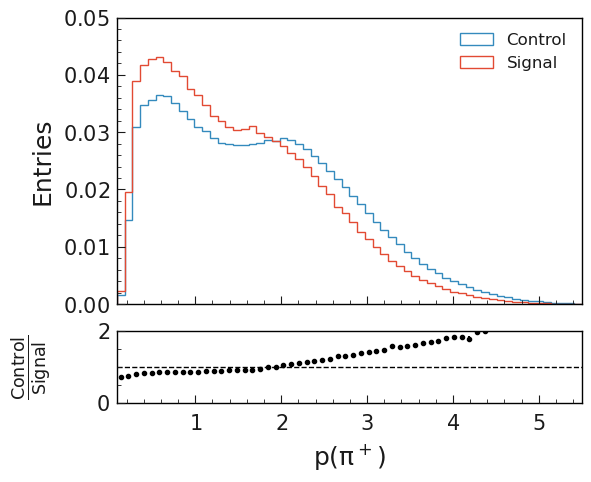

In [25]:
name = "Pip_p"
category = "category"
xlabel = r"$p(\pi^+)$"

# x1 = df[name][df[category] == 1]
# x2 = df[name][df[category] == 2]

x1 = df_generic_matched[name]
x2 = df_signal[name]

# x_range = (min(min(x1), min(x2)), max(max(x1), max(x2)))
x_range = (min(min(x1), min(x2)),5.5)

h1 = make_hist(x1, bins=60, range=x_range, weights=1/len(x1))
h2 = make_hist(x2, bins=60, range=x_range, weights=1/len(x2))


# Default comparison is ratio
fig, ax_main, ax_comparison = plot_two_hist_comparison(
    h1,
    h2,
    xlabel=xlabel,
    ylabel="Entries",
    h1_label="Control",
    h2_label="Signal",
)

fig.savefig(f"MC15rd_{tree_to_compare}_{name}.png", bbox_inches="tight")

In [26]:
h1

Histogram(Regular(60, 0.085686, 5.5, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.999844, variance=4.0788e-07)

In [27]:
h2

Histogram(Regular(60, 0.085686, 5.5, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.999966, variance=1.78337e-06)

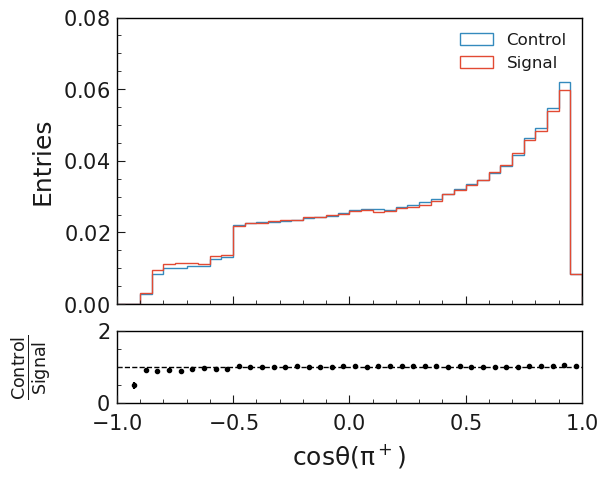

In [28]:
name = "Pip_cosTheta"
category = "category"
xlabel = r"$cos\theta(\pi^+)$"

# x1 = df[name][df[category] == 1]
# x2 = df[name][df[category] == 2]

x1 = df_generic_matched[name]
x2 = df_signal[name]

# x_range = (min(min(x1), min(x2)), max(max(x1), max(x2)))
x_range = (-1,1)

h1 = make_hist(x1, bins=40, range=x_range, weights=1/len(x1))
h2 = make_hist(x2, bins=40, range=x_range, weights=1/len(x2))


# Default comparison is ratio
fig, ax_main, ax_comparison = plot_two_hist_comparison(
    h1,
    h2,
    xlabel=xlabel,
    ylabel="Entries",
    h1_label="Control",
    h2_label="Signal",
)

fig.savefig(f"MC15rd_{tree_to_compare}_{name}.png", bbox_inches="tight")

In [29]:
from plothist import (
    create_variable_registry,
    update_variable_registry_ranges,
    get_variable_from_registry,
)
# custom_dict = {"legend_location" : 'upper left'}
# create_variable_registry(custom_dict=custom_dict)

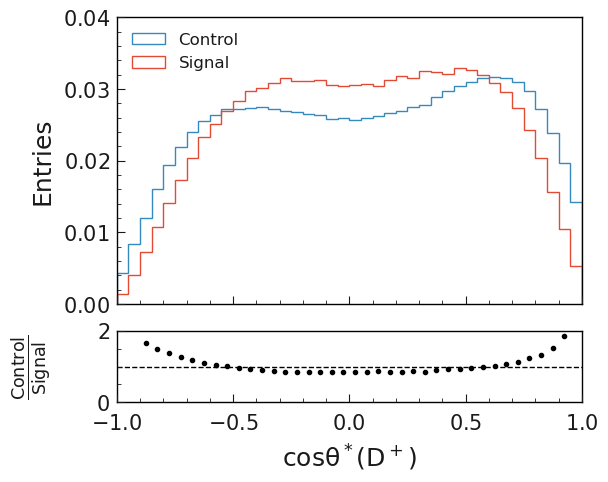

In [30]:
name = "Dp_CMS_cosTheta"
category = "category"
xlabel = r"$cos\theta^*(D^+)$"


x1 = df_generic_matched[name]
x2 = df_signal[name]

# x_range = (min(min(x1), min(x2)), max(max(x1), max(x2)))
x_range = (-1,1)

h1 = make_hist(x1, bins=40, range=x_range, weights=1/len(x1))
h2 = make_hist(x2, bins=40, range=x_range, weights=1/len(x2))


# Default comparison is ratio
fig, ax_main, ax_comparison = plot_two_hist_comparison(
    h1,
    h2,
    xlabel=xlabel,
    ylabel="Entries",
    h1_label="Control",
    h2_label="Signal",
)
# fig.legend(loc="upper left")
ax_main.legend(loc="upper left") 
fig.savefig(f"MC15rd_{tree_to_compare}_{name}.png", bbox_inches="tight")